In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

### Hypotéza 1:
Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako dálnicích.
K ověření hypotézy využijte $\chi^2$ test s tím, že také určíte, jestli nehody na silnicích 1. třídy
vedly častěji či méně často k fatální nehodě. V tom vám může pomoct “expected” výstup $\chi^2$
testu. Nerozlišujte počet následků, ale pouze nehody, kde došlo k jednomu a více úmrtí
(p13a  > 0).

In [9]:
df = pd.read_pickle("accidents.pkl.gz")[['p36', 'p13a']]
df = df[((df['p36'] == 0) | (df['p36'] == 1)) & (df['p13a'] >= 1)]
ct = pd.crosstab(df['p36'], df['p13a'])
display(ct)

p = chi2_contingency(ct)[1]
print('na hranici vyznamnosti: 5%')
if p < 0.05:
    print("zamítame nulovou hypotézu: na dálnicích se umíralo se jinou pravděpodobností jako na 1. třídě")
else:
    print("příjimáme nulovou hypotézu: na dálnicích se umíralo se stejnou pravděpodobností jako na 1. třídě")
display(p)

p13a,1,2,3,4
p36,,,,
0,155,9,1,1
1,815,70,16,10


na hranici vyznamnosti: 0.05
příjimáme nulovou hypotézu: na dálnicích se umíralo se stejnou pravděpodobností jako na 1. třídě


0.4335040105324415

### Hypotéza 2:
Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.
Využijte vhodný test a určete, zda je škoda na vozidlech vyšší či nižší a zda je tato vlastnost
na požadované hladině významnosti.

audi count    10681.000000
mean       609.013014
std        912.703640
min          1.000000
25%        200.000000
50%        400.000000
75%        800.000000
max      20000.000000
Name: p53, dtype: float64
skoda count    110176.000000
mean        395.577313
std         477.404487
min           1.000000
25%         100.000000
50%         300.000000
75%         500.000000
max       15000.000000
Name: p53, dtype: float64


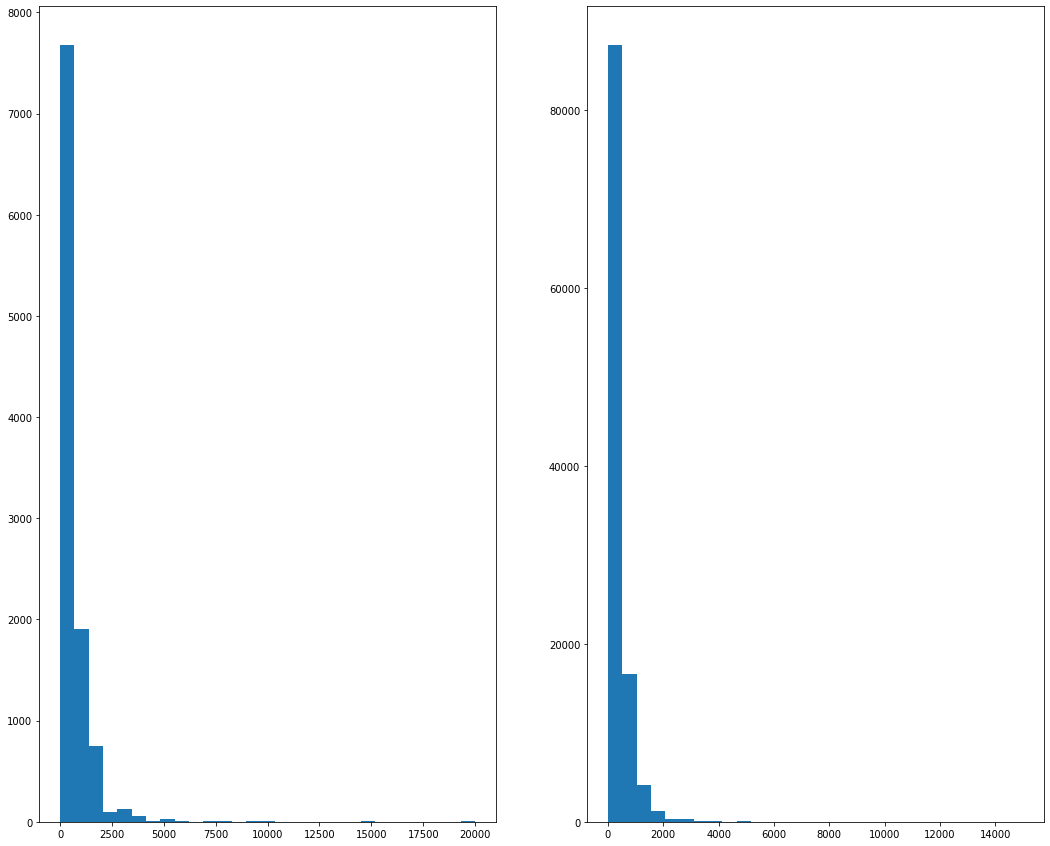

p53,1,2,3,4,5,6,7,8,9,10,...,7000,7500,8000,8010,8500,9000,10000,12000,15000,20000
p45a,,,,,,,,,,,,,,,,,,,,,
2,12,1,1,0,31,0,0,0,0,196,...,9,1,4,0,0,4,10,2,3,4
39,240,74,13,7,641,1,1,5,1,3216,...,10,1,14,1,1,2,8,0,1,0


4.995134385550724e-292
na hranici vyznamnosti: 5% (dosaženo: 4.995134385550724e-290 %)
zamítame nulovou hypotézu: Při nehodách vozidel značky Škoda není škoda menší


In [39]:
df = pd.read_pickle("accidents.pkl.gz")[['p45a', 'p53']]
brand1, brand2 = 2, 39
df = df[(df['p45a'].isin([brand1,brand2]))& (df['p53'] > 0)] #
# p45a - znacka 2=audi 39=skoda
# p53 - skoda v stokorunach

print('audi',df[df['p45a'] == brand1]['p53'].describe())
print('skoda',df[df['p45a'] == brand2]['p53'].describe())
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,15))
ax1.hist(df[df['p45a'] == brand1]['p53'], bins = np.linspace(df[df['p45a'] == brand1]['p53'].min(), df[df['p45a'] == brand1]['p53'].max(), 30))
ax2.hist(df[df['p45a'] == brand2]['p53'], bins = np.linspace(df[df['p45a'] == brand2]['p53'].min(), df[df['p45a'] == brand2]['p53'].max(), 30))
plt.show()

ct = pd.crosstab(df['p45a'], df['p53'])
display(ct)

p = chi2_contingency(ct)[1]
print(p)
print("na hranici vyznamnosti: 5% (dosaženo: "+str(p*100)+" %)")
if p < 0.05:
    print("zamítame nulovou hypotézu: Při nehodách vozidel značky Škoda není škoda menší")
else:
    print("příjimáme nulovou hypotézu: Při nehodách vozidel značky Škoda je škoda menší")